In [5]:
import sympy
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import rc
import mpmath
import pandas as pd
import matplotlib.pylab as plt

d0,d1,d2 = symbols(" d_0, d_1, d_2")

theta = symbols("theta")
cx, varx = symbols('alpha_x  delta_theta_x')

data = pd.read_csv('/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/raytracing/m1m2--5-5-0.1.csv', index_col=None, header=None, delimiter=" ")

data.columns = ["alpha1x/y", "before_x", "before_y", "ccd1x", "ccd1y", "ccd2x", "ccd2y"]
ccd1_x, ccd1_y, ccd2_x, ccd2_y = data['ccd1x'], data['ccd1y'],data['ccd2x'], data['ccd2y'] 

var = data['alpha1x/y']

before_x = data["before_x"]
before_y = data["before_y"]




In [6]:
def one_mirror_system(d,cx1, cy1, rot1, varx1, vary1):
    prop = np.matrix([ [1,0,d,0,0], 
                      [0,1,0,d,0], 
                      [0,0,1,0,0],
                      [0,0,0,1,0], 
                      [0,0,0,0,1]])
    
    axis = np.matrix([ [1,0,0,0,0],
                      [0,0,1,0,0], 
                      [0,0,np.cos(np.deg2rad(cx1)),0,0], 
                     [0,0,0,np.cos(np.deg2rad(cy1)),0],
                     [0,0,0,0,1]])
    rot = np.matrix([ [np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)), 0,0,0], 
                     [np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)), 0,0,0], 
                    [0,0,np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)),0],
                    [0,0,np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)),0],
                    [0,0,0,0,1]])
    tilt_mirror = np.matrix([ [1,0,0,0,0], 
                             [0,1,0,0,0],
                             [0,0,1,0, np.tan(2*np.deg2rad(varx1))],
                             [0,0,0,1,np.tan(2*np.deg2rad(vary1))],
                            [0,0,0,0,1]])
    return(prop*axis*rot*tilt_mirror)
    
#def ccd1_system(d1, d2, cx1, cx2, rot1, rot2, varx1, vary1)


def one_mirror_with_lens(d_1, d_2, cx1, cy1, rot1, varx1, vary1, f,dx,dy):
    prop1 = np.matrix([[1,0,d_1,0,0], 
                       [0,1,0,d_1,0], 
                      [0,0,1,0,0],
                      [0,0,0,1,0], 
                      [0,0,0,0,1]])
    prop2 = np.matrix([[1,0,d_2,0,0], 
                      [0,1,0,d_2,0], 
                      [0,0,1,0,0],
                      [0,0,0,1,0], 
                      [0,0,0,0,1]])
    axis = np.matrix([ [1,0,0,0,0],
                      [0,0,1,0,0], 
                      [0,0,np.cos(np.deg2rad(cx1)),0,0], 
                     [0,0,0,np.cos(np.deg2rad(cy1)),0],
                     [0,0,0,0,1]])
    rot = np.matrix([ [np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)), 0,0,0], 
                     [np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)), 0,0,0], 
                    [0,0,np.cos(np.deg2rad(rot1)), -np.sin(np.deg2rad(rot1)),0],
                    [0,0,np.sin(np.deg2rad(rot1)), np.cos(np.deg2rad(rot1)),0],
                    [0,0,0,0,1]])
    tilt_mirror = np.matrix([ [1,0,0,0,0], 
                             [0,1,0,0,0],
                             [0,0,1,0, np.tan(2*np.deg2rad(varx1))],
                             [0,0,0,1,np.tan(2*np.deg2rad(vary1))],
                            [0,0,0,0,1]])
    lens= np.matrix([ [1,0,0,0,dx], 
                    [0,1,0,0,dy], 
                    [-1/f,0,1,0,0],
                    [0,-1/f,0,1,0],
                    [0,0,0,0,1]])
    return(prop2*lens*prop1*axis*rot*tilt_mirror)

angles = np.arange(-5,5.1,.1)

analytical_before_x =[]
analytical_before_y =[]
analytical_before_thetax =[]
analytical_before_thetay =[]

for i in angles: 
    vec = np.matrix([ [0], [0], [0], [0], [1] ])
    r = one_mirror_system(400, 45,0, 90, i,i)
    analytical_before_x.append((r*vec).item(0))
    analytical_before_y.append((r*vec).item(1))
    analytical_before_thetax.append((r*vec).item(2))
    analytical_before_thetay.append((r*vec).item(3))


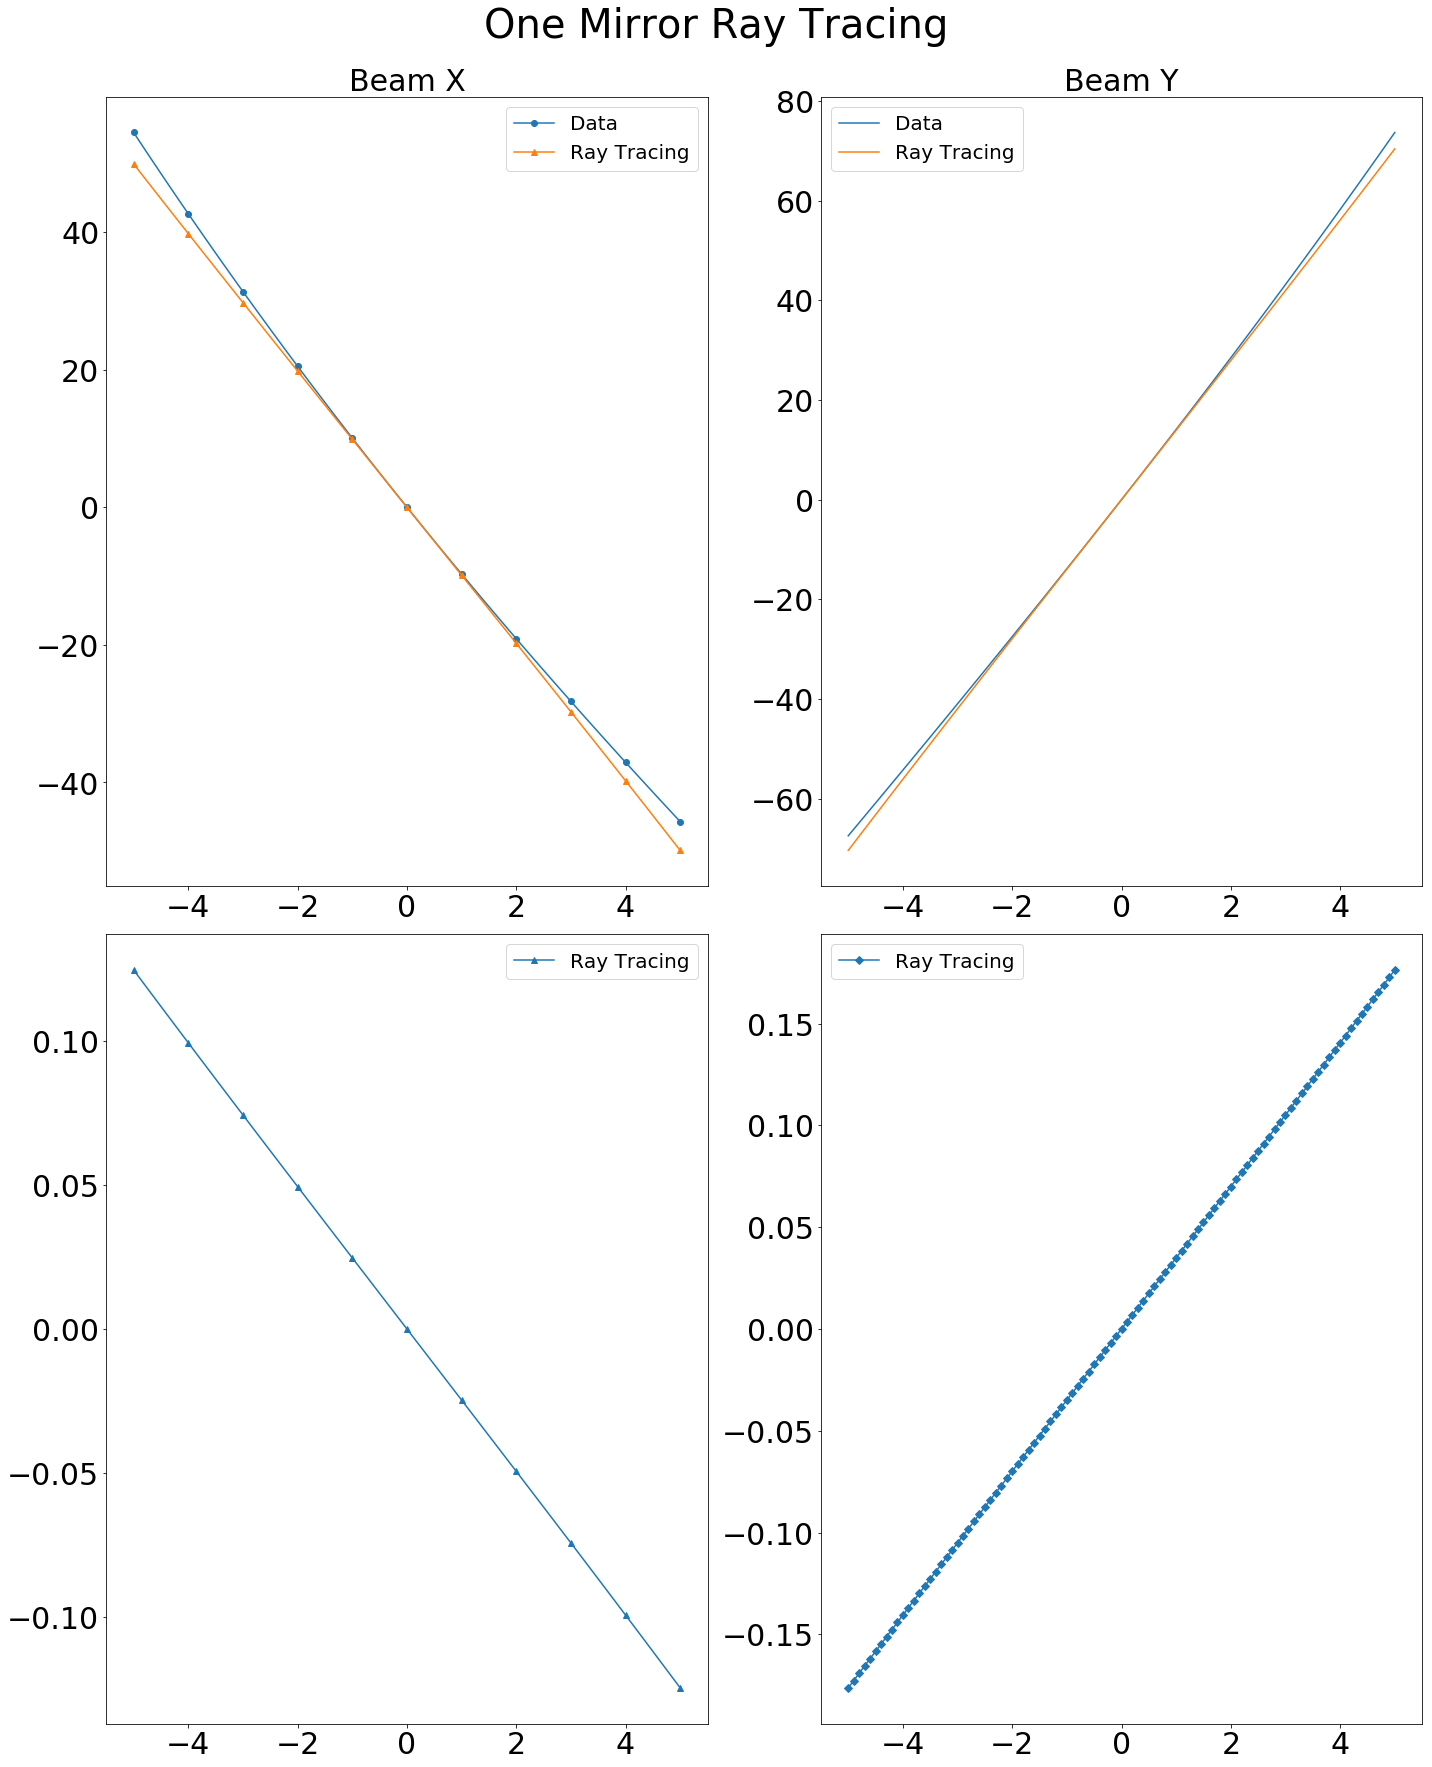

In [8]:
screens = plt.figure(figsize=(20,25))
s1 = screens.add_subplot(221)
s2 = screens.add_subplot(222)
s3 = screens.add_subplot(223)
s4 = screens.add_subplot(224)
#s5 = screens.add_subplot(235)
#s6 = screens.add_subplot(236)

s1.plot(var, before_x, marker='o', markevery=10, label = 'Data')
s1.plot(angles, analytical_before_x, marker='^', markevery=10, label = 'Ray Tracing')

s2.plot(var, before_y, label = 'Data')
s2.plot(var, analytical_before_y, label = 'Ray Tracing')

s1.legend(loc = 'best', fontsize=20)
s2.legend(loc = 'best', fontsize=20)

s3.plot(var, analytical_before_thetax, marker='^', markevery=10, label = 'Ray Tracing')
#s2.plot(angles, analytical_before_x, marker='^', markevery=10, label = 'Ray Tracing')

s4.plot(var, analytical_before_thetay, label = 'Ray Tracing', marker ='D')
#s3.plot(var, analytical_before_y, label = 'Ray Tracing')

s3.legend(loc = 'best', fontsize=20)
s4.legend(loc = 'best', fontsize=20)

s1.tick_params(axis='both',labelsize=30)
s2.tick_params(axis='both',labelsize=30)
s3.tick_params(axis='both',labelsize=30)
s4.tick_params(axis='both',labelsize=30)



s1.set_title('Beam X',fontsize=30)
s2.set_title('Beam Y',fontsize=30)
screens.suptitle('One Mirror Ray Tracing', fontsize=40)
screens.tight_layout()
screens.subplots_adjust(top=.93)


In [10]:
mlm= pd.read_csv('/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/raytracing/m1m2l1nodecentering--2-2-0.1.csv',
                 index_col=None, header=None, delimiter=" ")

mlm_decentered = pd.read_csv('/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/raytracing/m1m2l1decenteringby2mm--0.5-0.5-0.01.csv', index_col=None, header=None, delimiter=" ")

mlm.columns = ["alpha1x/y", "before_x", "before_y", "ccd1x", "ccd1y", "ccd2x", "ccd2y"]

mlm_decentered.columns=["alpha1x/y", "before_x", "before_y", "ccd1x", "ccd1y", "ccd2x", "ccd2y"]

In [16]:
mlm_decentered

,alpha1x/y,before_x,before_y,ccd1x,ccd1y,ccd2x,ccd2y
0,-0.50,4.508090,-3.500350,2.990786,-1.114672,-0.693221,4.989768
1,-0.49,4.457554,-3.430806,3.010921,-1.092859,-0.500676,4.887883
2,-0.48,4.407029,-3.361239,3.031038,-1.071018,-0.308139,4.786107
3,-0.47,4.356516,-3.291649,3.051138,-1.049149,-0.115611,4.684436
4,-0.46,4.306016,-3.222037,3.071220,-1.027252,0.076911,4.582871
5,-0.45,4.255527,-3.152404,3.091286,-1.005328,0.269426,4.481410
6,-0.44,4.205051,-3.082748,3.111335,-0.983378,0.461936,4.380051
7,-0.43,4.154587,-3.013071,3.131367,-0.961402,0.654443,4.278793
8,-0.42,4.104137,-2.943373,3.151384,-0.939401,0.846946,4.177635
9,-0.41,4.053698,-2.873654,3.171386,-0.917375,1.039448,4.076574


[ -5.00000000e-01  -4.75000000e-01  -4.50000000e-01  -4.25000000e-01
  -4.00000000e-01  -3.75000000e-01  -3.50000000e-01  -3.25000000e-01
  -3.00000000e-01  -2.75000000e-01  -2.50000000e-01  -2.25000000e-01
  -2.00000000e-01  -1.75000000e-01  -1.50000000e-01  -1.25000000e-01
  -1.00000000e-01  -7.50000000e-02  -5.00000000e-02  -2.50000000e-02
   4.44089210e-16   2.50000000e-02   5.00000000e-02   7.50000000e-02
   1.00000000e-01   1.25000000e-01   1.50000000e-01   1.75000000e-01
   2.00000000e-01   2.25000000e-01   2.50000000e-01   2.75000000e-01
   3.00000000e-01   3.25000000e-01   3.50000000e-01   3.75000000e-01
   4.00000000e-01   4.25000000e-01   4.50000000e-01   4.75000000e-01
   5.00000000e-01]


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


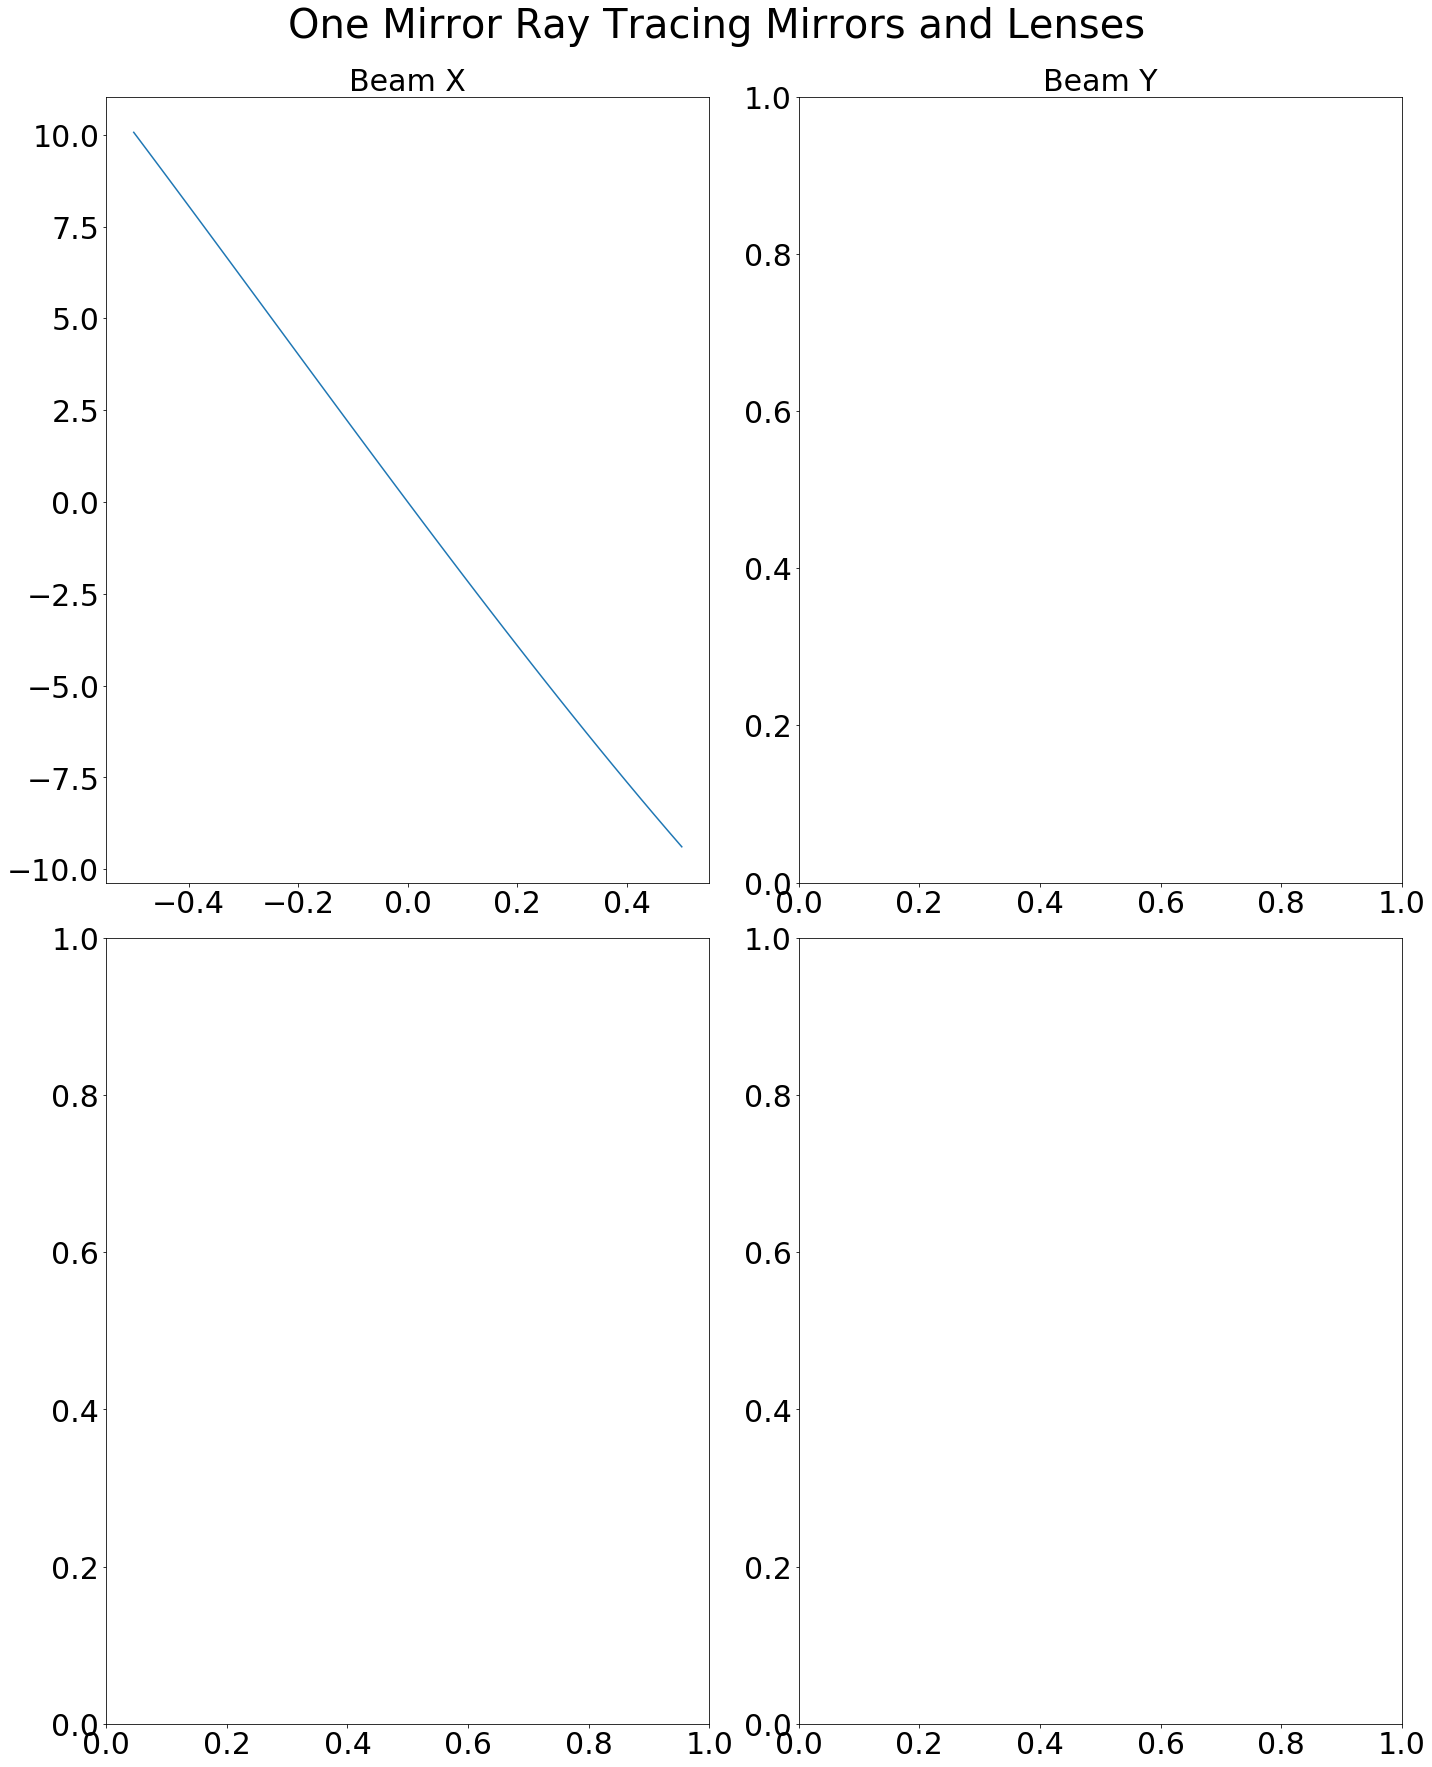

In [27]:
#lens_mirror_system = one_mirror_with_lens(200, 200, 45, 0, 90, varx1, vary1, 200):

analytical_before_x_m =[]
analytical_before_y_m =[]
analytical_before_thetax_m =[]
analytical_before_thetay_m =[]

analytical_before_x_l =[]
analytical_before_y_l =[]
analytical_before_thetax_l =[]
analytical_before_thetay_l =[]

analytical_before_x_ldisp =[]
analytical_before_y_ldisp =[]
analytical_before_thetax_ldisp =[]
analytical_before_thetay_ldisp =[]



angles_l = np.arange(-0.50,0.51,0.025)

print(angles_l)

for i in angles_l: 
    vec = np.matrix([ [0], [0], [0], [0], [1] ])
    r_mirror = one_mirror_system(400, 45,0, 90, i,i)
    r = one_mirror_with_lens(200, 200, 45, 0, 90, i, i, 200,0,0)
    r_dispx = one_mirror_with_lens(200, 200, 45, 0, 90, i, i, 200,2,0)
    
    analytical_before_x_m.append((r*vec).item(0))
    analytical_before_y_m.append((r*vec).item(1))
    analytical_before_thetax_m.append((r*vec).item(2))
    analytical_before_thetay_m.append((r*vec).item(3))
    
    analytical_before_x_l.append((r*vec).item(0))
    analytical_before_y_l.append((r*vec).item(1))
    analytical_before_thetax_l.append((r*vec).item(2))
    analytical_before_thetay_l.append((r*vec).item(3))
    
    analytical_before_x_ldisp.append((r_dispx*vec).item(0))
    analytical_before_y_ldisp.append((r_dispx*vec).item(1))
    analytical_before_thetax_ldisp.append((r_dispx*vec).item(2))
    analytical_before_thetay_ldisp.append((r_dispx*vec).item(3))


screens = plt.figure(figsize=(20,25))
s1 = screens.add_subplot(221)
s2 = screens.add_subplot(222)
s3 = screens.add_subplot(223)
s4 = screens.add_subplot(224)
#s5 = screens.add_subplot(235)
#s6 = screens.add_subplot(236)

s1.plot(angles_l, mlm['before_x'])


s3.legend(loc = 'best', fontsize=20)
s4.legend(loc = 'best', fontsize=20)

s1.tick_params(axis='both',labelsize=30)
s2.tick_params(axis='both',labelsize=30)
s3.tick_params(axis='both',labelsize=30)
s4.tick_params(axis='both',labelsize=30)


s1.set_title('Beam X',fontsize=30)
s2.set_title('Beam Y',fontsize=30)
screens.suptitle('One Mirror Ray Tracing Mirrors and Lenses', fontsize=40)
screens.tight_layout()
screens.subplots_adjust(top=.93)




ValueError: x and y must have same first dimension, but have shapes (11,) and (41,)

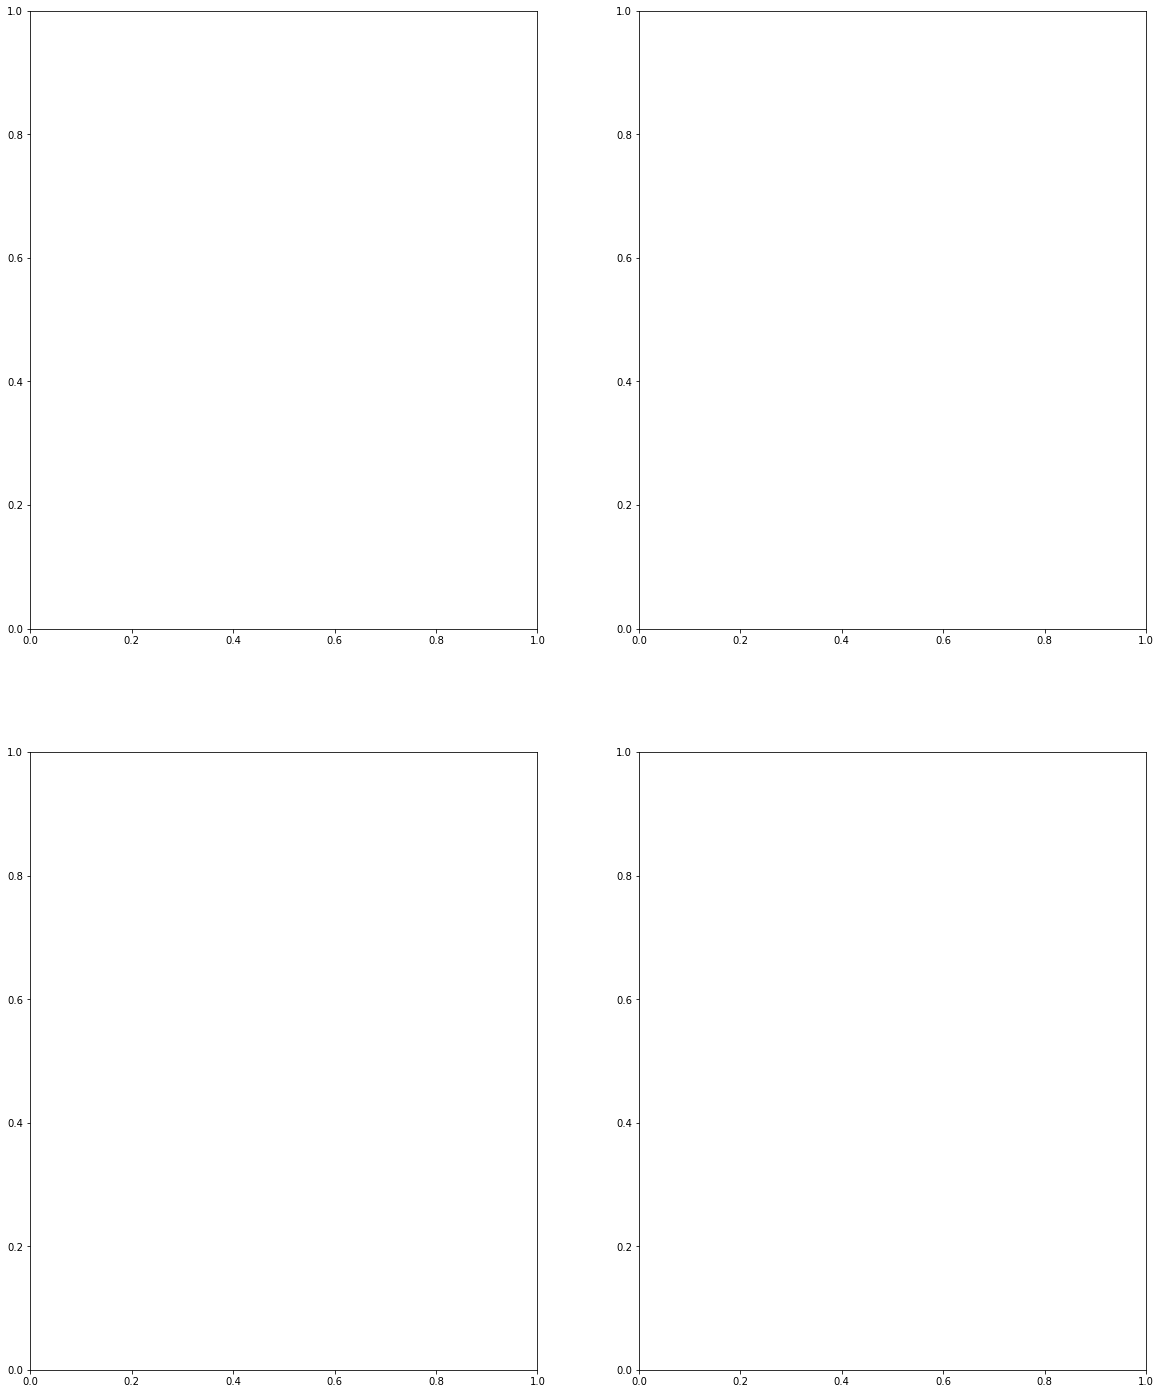

In [224]:
screens = plt.figure(figsize=(20,25))
s1 = screens.add_subplot(221)
s2 = screens.add_subplot(222)
s3 = screens.add_subplot(223)
s4 = screens.add_subplot(224)

#s1.plot(angles_l, mlm['ccd1x'], marker = 'd', color = 'crimson', label = 'no decentering')
s1.plot(angles_l, mlm_decentered['ccd1x'], marker = 'd', color = 'dodgerblue', label = 'decentering')
#s2.plot(angles_l, mlm['ccd1y'], marker = 's', color = 'crimson',label = 'no decentering')
s2.plot(angles_l, mlm_decentered['ccd1y'], marker = 's', color = 'dodgerblue',label = 'decentering')

#s3.plot(angles_l, mlm['ccd2x'], marker = 'd', color = 'limegreen',label = 'no decentering')
s3.plot(angles_l, mlm_decentered['ccd2x'], marker = 's', color = 'orange',label = 'decentering')
#s4.plot(angles_l, mlm['ccd2y'], marker = 's', color = 'limegreen',label = 'no decentering')
s4.plot(angles_l, mlm_decentered['ccd2y'], marker = 's', color = 'orange',label = 'decentering')

s1.legend(loc = 'best', fontsize=20)
s2.legend(loc = 'best', fontsize=20)
s3.legend(loc = 'best', fontsize=20)
s4.legend(loc = 'best', fontsize=20)

In [174]:
np.rad2deg(np.arctan(10/400))/2

In [218]:
np.rad2deg(np.arctan(5/200))/2